# DSCI 100 Group Project: Predicting Diabetes Diagnoses

## Introduction

The Multiple Disease Prediction dataset uses various health-related parameters (such as glucose and cholesterol levels, insulin levels, and BMI) to check the health of a person - whether they are healthy or afflicted with a specific disease (Diabetes, Thalasse, Heart Disease Anemia, or Thromboc). In this project, we set out to create a classification model to examine to what accuracy we can predict the disease a person with certain parameters can be diagnosed with.

## Methods & Results

### Loading libraries

In [19]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)
install.packages("themis")
library(themis)
install.packages("yardstick")
library(yardstick)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Loading the data

In [2]:
blood_samples <- read_csv("data/blood_samples_dataset.csv")
head(blood_samples)

Rows: 551 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Disease
dbl (24): Glucose, Cholesterol, Hemoglobin, Platelets, White Blood Cells, Re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,⋯,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.001827491,0.03369271,0.11475525,0.9979266,0.56260425,0.86649852,0.57804177,0.91461549,0.02686409,0.03864091,⋯,0.6532299,0.1861045,0.4303978,0.01667792,0.8853520,0.6527334,0.78823514,0.05478811,0.03131344,Thalasse
0.436679025,0.97265269,0.08499819,0.1809086,0.67573568,0.56388877,0.79838214,0.67036126,0.37609238,0.18489008,⋯,0.8335397,0.1530008,0.4585328,0.40184452,0.6359693,0.5744248,0.04702496,0.60798545,0.59412308,Diabetes
0.545697158,0.32481486,0.58446699,0.4757480,0.55859609,0.66100693,0.93405588,0.38178237,0.50034229,0.53182931,⋯,0.6789008,0.2204789,0.8171514,0.69098100,0.1016329,0.8557403,0.55112419,0.41329445,0.07090907,Heart Di
0.172994018,0.05035101,0.73599966,0.7820224,0.06943548,0.08521937,0.03290692,0.46061943,0.78544795,0.49149522,⋯,0.3815002,0.4593956,0.4201545,0.79853707,0.3992360,0.3245997,0.49950360,0.43666181,0.24276586,Diabetes
0.758534051,0.73996775,0.59786776,0.7726835,0.87571974,0.86026493,0.48618863,0.48668607,0.62104804,0.19175598,⋯,0.9933815,0.2723384,0.6635788,0.26522715,0.9188472,0.8049102,0.57111909,0.18836767,0.75084752,Heart Di
0.321872226,0.55464909,0.19565226,0.4272160,0.80775117,0.37696424,0.51952589,0.02808989,0.38253820,0.56820531,⋯,0.7113771,0.8878635,0.3703437,0.60706574,0.9364447,0.1603547,0.10899414,0.59907098,0.56053500,Heart Di


The dataset is already in tidy format where each column is a variable, each row is a single observation, and each cell is a value.
All values in the dataset also have already been centered and scaled to a standard number from 0 to 1. 

The column names are not in the correct format as there are capital leters and spaces. The `Disease` column is also of type character when it should be factor type as there are distinct classes.

We will use clean_names and mutate the `Disease` column to be a factor

In [3]:
blood_samples <- blood_samples |>
                clean_names() |>
                mutate(disease = as_factor(disease))

head(blood_samples)

glucose,cholesterol,hemoglobin,platelets,white_blood_cells,red_blood_cells,hematocrit,mean_corpuscular_volume,mean_corpuscular_hemoglobin,mean_corpuscular_hemoglobin_concentration,⋯,hb_a1c,ldl_cholesterol,hdl_cholesterol,alt,ast,heart_rate,creatinine,troponin,c_reactive_protein,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.001827491,0.03369271,0.11475525,0.9979266,0.56260425,0.86649852,0.57804177,0.91461549,0.02686409,0.03864091,⋯,0.6532299,0.1861045,0.4303978,0.01667792,0.8853520,0.6527334,0.78823514,0.05478811,0.03131344,Thalasse
0.436679025,0.97265269,0.08499819,0.1809086,0.67573568,0.56388877,0.79838214,0.67036126,0.37609238,0.18489008,⋯,0.8335397,0.1530008,0.4585328,0.40184452,0.6359693,0.5744248,0.04702496,0.60798545,0.59412308,Diabetes
0.545697158,0.32481486,0.58446699,0.4757480,0.55859609,0.66100693,0.93405588,0.38178237,0.50034229,0.53182931,⋯,0.6789008,0.2204789,0.8171514,0.69098100,0.1016329,0.8557403,0.55112419,0.41329445,0.07090907,Heart Di
0.172994018,0.05035101,0.73599966,0.7820224,0.06943548,0.08521937,0.03290692,0.46061943,0.78544795,0.49149522,⋯,0.3815002,0.4593956,0.4201545,0.79853707,0.3992360,0.3245997,0.49950360,0.43666181,0.24276586,Diabetes
0.758534051,0.73996775,0.59786776,0.7726835,0.87571974,0.86026493,0.48618863,0.48668607,0.62104804,0.19175598,⋯,0.9933815,0.2723384,0.6635788,0.26522715,0.9188472,0.8049102,0.57111909,0.18836767,0.75084752,Heart Di
0.321872226,0.55464909,0.19565226,0.4272160,0.80775117,0.37696424,0.51952589,0.02808989,0.38253820,0.56820531,⋯,0.7113771,0.8878635,0.3703437,0.60706574,0.9364447,0.1603547,0.10899414,0.59907098,0.56053500,Heart Di


In [4]:
disease_counts <- blood_samples |>
group_by(disease) |>
summarize(count = n())
disease_counts

disease,count
<fct>,<int>
Thalasse,62
Diabetes,310
Heart Di,39
Anemia,100
Thromboc,19
Healthy,21


Due to the disproportionately large sample of Diabetes observations compared to all other diseases, we will group all non-diabetes observations into their own column, "Not Diabetes", and compare with the number of diabetes observations:

In [5]:
blood_samples <- blood_samples |>
                mutate(disease = recode(disease, 
                                       "Diabetes" = "Diabetes",
                                       "Thalasse" = "Not Diabetes",
                                       "Heart Di" = "Not Diabetes",
                                       "Anemia" = "Not Diabetes",
                                       "Thromboc" = "Not Diabetes",
                                       "Healthy" = "Not Diabetes"))
                 

head(blood_samples)

glucose,cholesterol,hemoglobin,platelets,white_blood_cells,red_blood_cells,hematocrit,mean_corpuscular_volume,mean_corpuscular_hemoglobin,mean_corpuscular_hemoglobin_concentration,⋯,hb_a1c,ldl_cholesterol,hdl_cholesterol,alt,ast,heart_rate,creatinine,troponin,c_reactive_protein,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.001827491,0.03369271,0.11475525,0.9979266,0.56260425,0.86649852,0.57804177,0.91461549,0.02686409,0.03864091,⋯,0.6532299,0.1861045,0.4303978,0.01667792,0.8853520,0.6527334,0.78823514,0.05478811,0.03131344,Not Diabetes
0.436679025,0.97265269,0.08499819,0.1809086,0.67573568,0.56388877,0.79838214,0.67036126,0.37609238,0.18489008,⋯,0.8335397,0.1530008,0.4585328,0.40184452,0.6359693,0.5744248,0.04702496,0.60798545,0.59412308,Diabetes
0.545697158,0.32481486,0.58446699,0.4757480,0.55859609,0.66100693,0.93405588,0.38178237,0.50034229,0.53182931,⋯,0.6789008,0.2204789,0.8171514,0.69098100,0.1016329,0.8557403,0.55112419,0.41329445,0.07090907,Not Diabetes
0.172994018,0.05035101,0.73599966,0.7820224,0.06943548,0.08521937,0.03290692,0.46061943,0.78544795,0.49149522,⋯,0.3815002,0.4593956,0.4201545,0.79853707,0.3992360,0.3245997,0.49950360,0.43666181,0.24276586,Diabetes
0.758534051,0.73996775,0.59786776,0.7726835,0.87571974,0.86026493,0.48618863,0.48668607,0.62104804,0.19175598,⋯,0.9933815,0.2723384,0.6635788,0.26522715,0.9188472,0.8049102,0.57111909,0.18836767,0.75084752,Not Diabetes
0.321872226,0.55464909,0.19565226,0.4272160,0.80775117,0.37696424,0.51952589,0.02808989,0.38253820,0.56820531,⋯,0.7113771,0.8878635,0.3703437,0.60706574,0.9364447,0.1603547,0.10899414,0.59907098,0.56053500,Not Diabetes


In [6]:
diabetes_counts <- blood_samples |>
group_by(disease) |>
summarize(count = n())
diabetes_counts

disease,count
<fct>,<int>
Not Diabetes,241
Diabetes,310


Selecting for or against diabetes seems like a better way to approach classification here. We will create our model to identify whether a person has diabetes or not. 

### Summarizing the training data

In [7]:
unique_diseases <- select(blood_samples, disease) |>
            distinct()
unique_diseases

disease
<fct>
Not Diabetes
Diabetes


Spliting the data into a training subset and a testing subset. 75% of the total data goes to training, 25% to testing.

In [8]:
set.seed(1)

blood_samples_split <- initial_split(blood_samples, prop = 0.75, strata = disease)
training_blood_samples <- training(blood_samples_split)
testing_blood_samples <- testing(blood_samples_split)

How many observations are there for each disease.

In [9]:
obersvation_count <- training_blood_samples |>
            group_by(disease) |>
            summarize(count = n())
obersvation_count

disease,count
<fct>,<int>
Not Diabetes,180
Diabetes,232


In [10]:
dns_recipe <- recipe(disease ~ ., data = training_blood_samples) |>
    step_downsample(disease, under_ratio = 1, skip = FALSE) |>
    prep()

training_blood_samples <- bake(dns_recipe, training_blood_samples)

obersvation_count <- training_blood_samples |>
            group_by(disease) |>
            summarize(count = n())

obersvation_count

disease,count
<fct>,<int>
Not Diabetes,180
Diabetes,180


### Visualizing the training data

The primary signifiers of diabetes is in the glucose levels and insulin levels [source]. As we have no data for insulin, we will compare the quantities of glucose in the non-diabetic group versus the diabetic group.

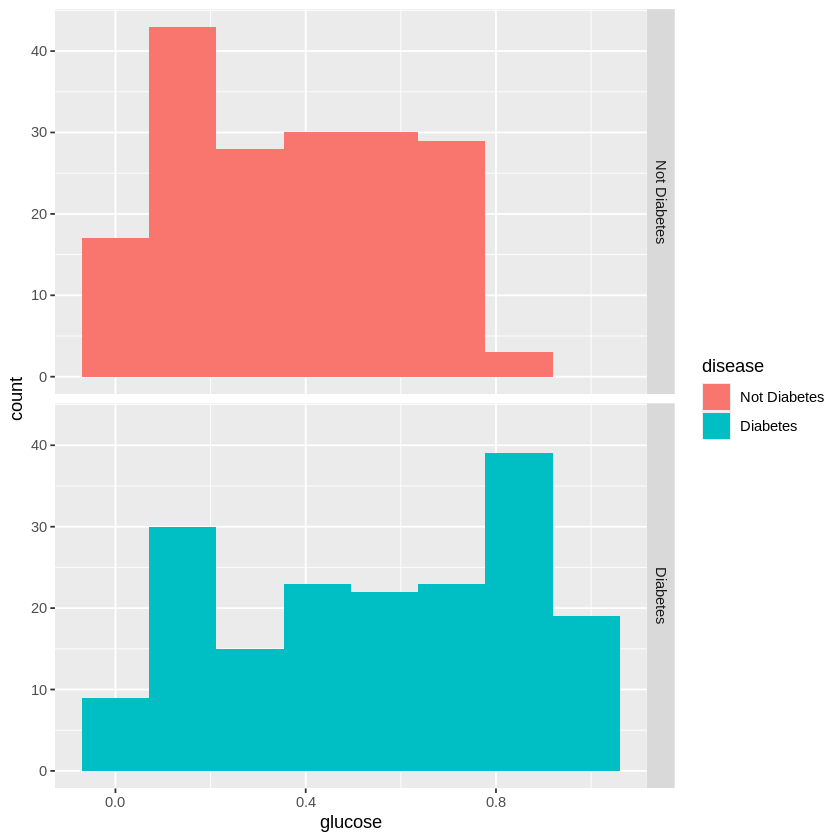

In [11]:
glucose_histogram <- training_blood_samples |> 
                        ggplot(aes(x=glucose, fill = disease)) +
                        geom_histogram(bins = 8) +
                        facet_grid(rows = vars(disease))
glucose_histogram

We can now make a classification model to identify whether a person has diabetes or not. First, we create a recipe and model, (using glucose as a predictor? Looks like all predictors rn), then check for which k we should use for the number of neighbours using a workflow.
We then create a plot of the accuracy estimate against the number of k. 


In [12]:
disease_recipe <- recipe(disease ~ ., data = training_blood_samples)

disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")


k_vals <- tibble(neighbors = seq(from = 1, to = 51, by = 2))

disease_vfold <- vfold_cv(training_blood_samples, v = 5, strata = disease)


tune_results <- workflow() |>
  add_recipe(disease_recipe) |>
  add_model(disease_spec) |>
  tune_grid(resamples = disease_vfold, grid = k_vals) |>
  collect_metrics()

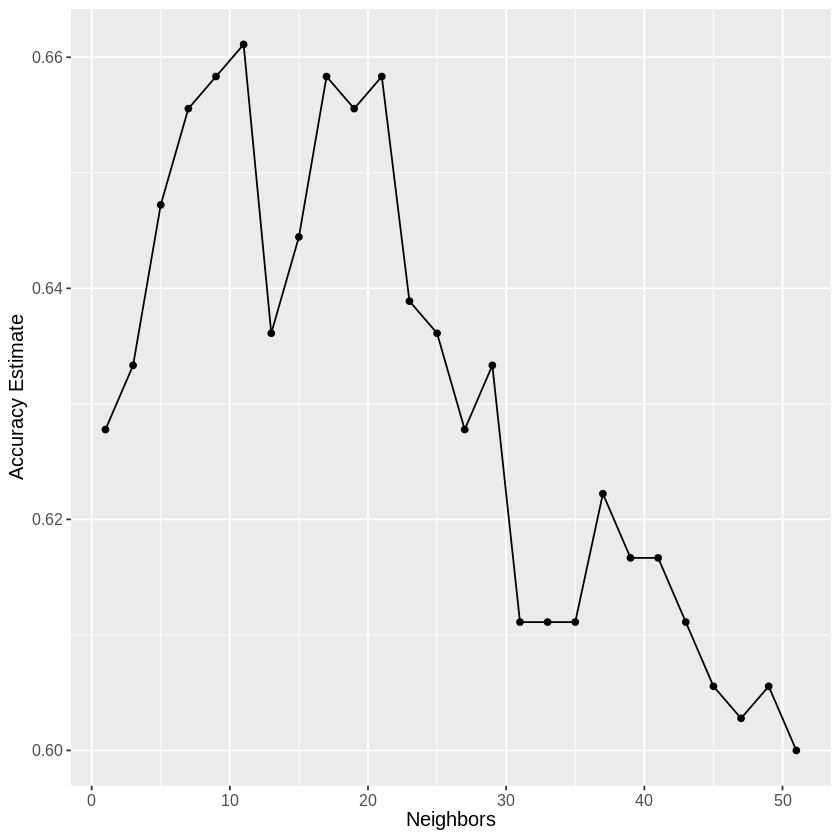

In [13]:
accuracies <- tune_results |>
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [14]:
disease_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(disease_recipe) |>
  add_model(disease_best_k) |>
  fit(data = training_blood_samples)


In [ ]:
diabetes_predictions <- predict(knn_fit, testing_blood_samples) |>
  bind_cols(testing_blood_samples)

diabetes_predictions |>
  metrics(truth = disease, estimate = .pred_class) |>
  filter(.metric == "accuracy")


# diabetes_test_predictions |>
#   metrics(truth = disease, estimate = .pred_class) |>
#   filter(.metric == "accuracy")

# diabetes_test_predictions |>
#   precision(truth = disease, estimate = .pred_class, event_level = "first")

# diabetes_test_predictions |>
#   recall(truth = disease, estimate = .pred_class, event_level = "first")

## Discussion

Based on the analysis that we performed on the data, we were able to create a model for predicting diabetes that achieves 58% accuracy on the test data. This result is clearly not ideal with the model performing only slightly better than random chance (50%). The findings suggest that the performance was significantly impacted by the quality of the dataset that was used. Given that there was only 412 rows of data to train the model, more data would be needed to create a better model. To improve the data quality, we addressed the class imbalance which can affect KNN classifier performance. We compared the accuracy of upsampling versus downsampling and found that downsampling yielded better accuracy. 


If the performance of the model can be significantly improved, such a model could see use in healthcare settings and applications. Ideally, more relevant health parameters are utilized to determine an individual’s level of risk. This can then help the individual guide their self-care and prevent themselves from developing diabetes. Studies have shown that North America currently faces “a high burden of diabetes” which poses concerns to society broadly (Yisahek et. al). Thus, we think this raises new questions regarding the intersection of diabetes and data science that we have explore

* Are there additional health parameters that should be measured for training the model?
* Are there ethical concerns regarding the use of using classification models to predict health risks?
* How would an individual input such information into the model to receive a diagnosis?
* A variety of different models exist for classification, which would be the best for this application?
* How can the model be expanded to predict other diseases beyond diabetes?abetes?


### References

Aboelnaga, Ehab. “Multiple Disease Prediction.” *Kaggle*, 3 Mar. 2024, \
&nbsp;&nbsp;&nbsp;&nbsp;www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction. \
\
Yisahak, Samrawit F., et al. “Diabetes in North America and the Caribbean: An Update.” *Diabetes Research and* \
&nbsp;&nbsp;&nbsp;&nbsp;*Clinical Practice*, Elsevier, 1 Dec. 2013, www.sciencedirect.com/science/article/pii/S0168822713003926. 